### LightGBM Classifier 
##### 28 Features, 18 features, 7 features

In [1]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 310.6 kB/s eta 0:00:03
   -------------- ------------------------- 0.5/1.5 MB 310.6 kB/s eta 0:00:03
   -------------- ------------------------- 0.5/1.5 MB 310.6 kB/s eta 0:00:03
   -------------- ------------------------- 0.5/1.5 MB 310.6 kB/s eta 0:00:03
   --------------------- ------------------ 0.8/1.5 MB 307.7 kB/s eta 0:00:03
   --------------------- ------------------ 0.8/1.5 MB 307.7 kB/s eta 0:00:03
   --------------------- ------------------ 0.8/1.5 MB 307.7 kB/s eta 0:00:03
   --------------------- ------------------ 0.8/1.5 MB 307.7 kB/s eta 0:00:03
   ----------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Lightgbm 28 features
Mean Accuracy: 99.79%
Mean Precision: 99.79%
Mean Recall: 99.79%
Mean F1 Score: 99.79%
Training Time: 7.40 seconds

Test Metrics:
Accuracy: 99.79%
Precision: 99.79%
Recall: 99.79%
F1 Score: 99.79%


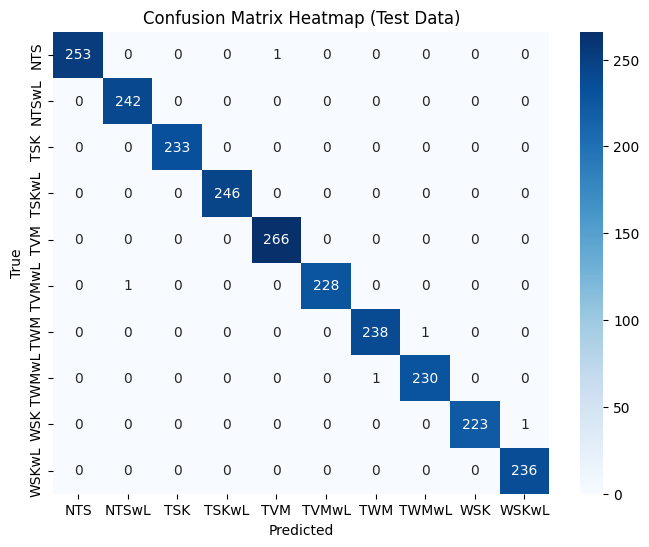

In [2]:
from lightgbm import LGBMClassifier, plot_tree, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
print("Lightgbm 28 features")

train_file_path = '../Dataset/train_28f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)

test_file_path = '../Dataset/test_28f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)

labels_to_drop = [''] 

train_data = train_data[~train_data['Class'].isin(labels_to_drop)]
test_data = test_data[~test_data['Class'].isin(labels_to_drop)]

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

features_to_drop = ['Class']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the LightGBM model
lgb_model = LGBMClassifier(verbose=-1, max_depth=7, random_state=42)

stratified_kfold = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    lgb_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = lgb_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

end_time = time.time()

mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")

training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

lgb_model.fit(X_train, y_train_encoded)
y_test_pred = lgb_model.predict(X_test)

accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")

conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

Lightgbm 18 features
Mean Accuracy: 99.76%
Mean Precision: 99.76%
Mean Recall: 99.76%
Mean F1 Score: 99.76%
Training Time: 6.41 seconds

Test Metrics:
Accuracy: 99.71%
Precision: 99.71%
Recall: 99.71%
F1 Score: 99.71%


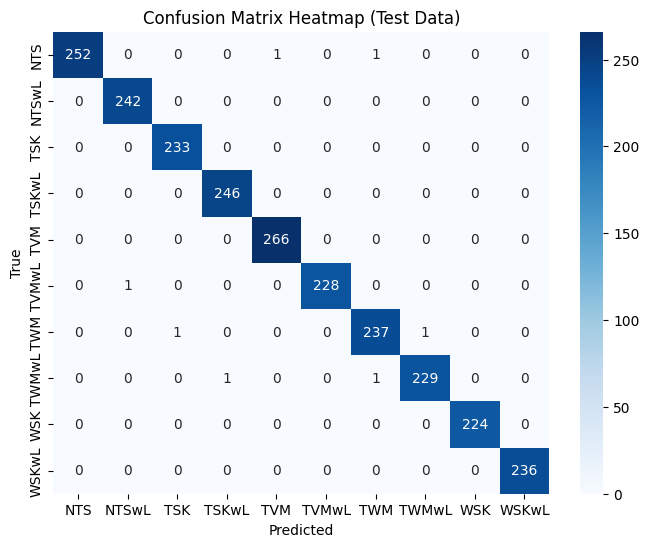

In [3]:
from lightgbm import LGBMClassifier, plot_tree, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
print("Lightgbm 18 features")

train_file_path = '../Dataset/train_18f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)

test_file_path = '../Dataset/test_18f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)

labels_to_drop = [''] 

train_data = train_data[~train_data['Class'].isin(labels_to_drop)]
test_data = test_data[~test_data['Class'].isin(labels_to_drop)]

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

features_to_drop = ['Class']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the LightGBM model
lgb_model = LGBMClassifier(verbose=-1, max_depth=7, random_state=42)

stratified_kfold = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    lgb_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = lgb_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

end_time = time.time()

mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")

training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

lgb_model.fit(X_train, y_train_encoded)

y_test_pred = lgb_model.predict(X_test)

accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")

conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

In [5]:
from lightgbm import LGBMClassifier, plot_tree, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

print("Lightgbm 7 features")

train_file_path = '../Dataset/train_18f.csv'
train_data = pd.read_csv(train_file_path)

test_file_path = '../Dataset/test_18f.csv' 
test_data = pd.read_csv(test_file_path)

features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

# 'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#initialize xlight gbm model
lgb_model = LGBMClassifier(verbose=-1, max_depth=7, random_state=42)

stratified_kfold = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)

start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    lgb_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = lgb_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))


end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")


lgb_model.fit(X_train, y_train_encoded)


y_test_pred = lgb_model.predict(X_test)

accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")

joblib.dump(lgb_model, '../Models/lgb_model.pkl')  
joblib.dump(label_encoder, '../Models/label_encoder_lgb.pkl') 


Lightgbm 7 features
Training Time: 4.70 seconds

Test Metrics:
Accuracy: 99.79%


['../Models/label_encoder_lgb.pkl']